In [64]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [7]:
data = pd.read_excel('Train.xlsx')
data.head(10)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.158
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.281
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.456
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.220
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.763
5,NTM1,X1,A10,DIRECT,Large,Powder,2020-09-01,137.932
6,NTM2,X1,A19,DIRECT,Large,Powder,2020-09-01,105.589
7,NTM2,X1,A29,DIRECT,Small,Powder,2021-03-01,90.775
8,NTM3,X1,A18,RETAIL,Large,Liquid,2020-11-01,154.042
9,NTM3,X2,A20,DIRECT,Large,Powder,2021-03-01,85.706


In [8]:
data.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.469
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.559
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.639
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.044
550175,NTM1,X1,A3,DIRECT,Small,Powder,2020-11-01,139.421


<Axes: >

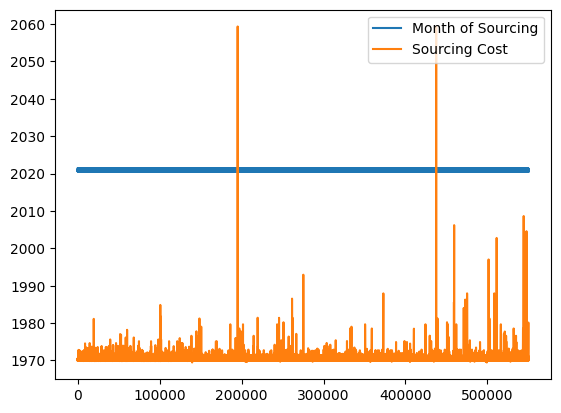

In [9]:
#Visualize the data
data.plot()

First few rows of the dataset:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-05-01         10.158  
1       Powder        2020-10-01        134.281  
2       Powder        2020-12-01         12.456  
3       Powder        2021-02-01        107.220  
4       Liquid        2020-11-01        197.763  

Summary statistics:
                   Month of Sourcing  Sourcing Cost
count                         550176  550176.000000
mean   2020-12-08 10:27:28.769848576     108.816793
min              2020-07-01 00:00:00    -196.070000
25%              20

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


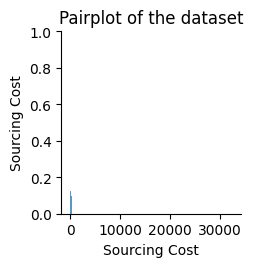

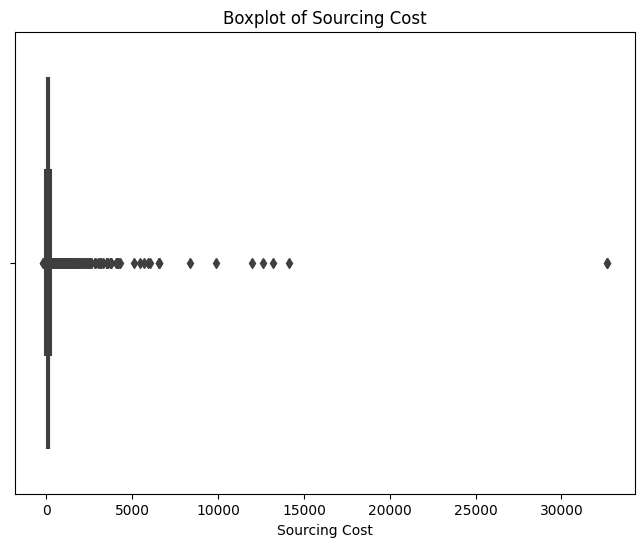

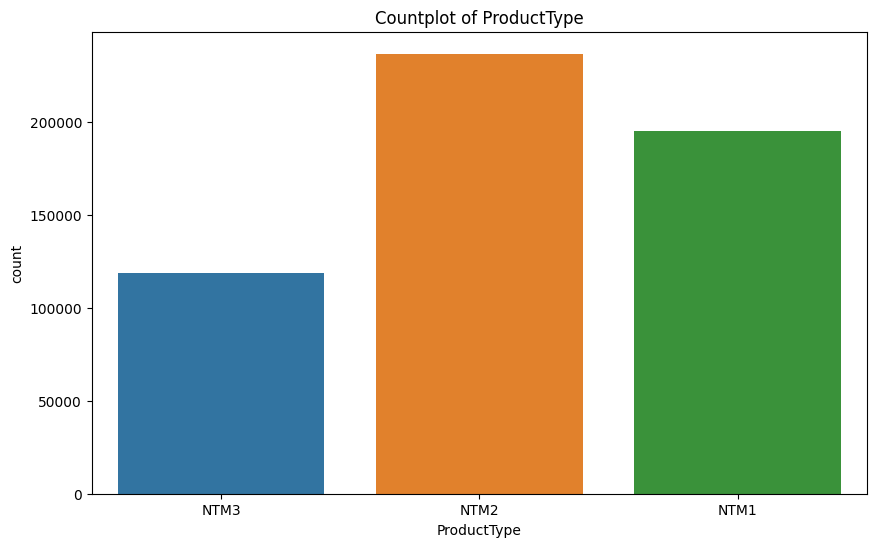

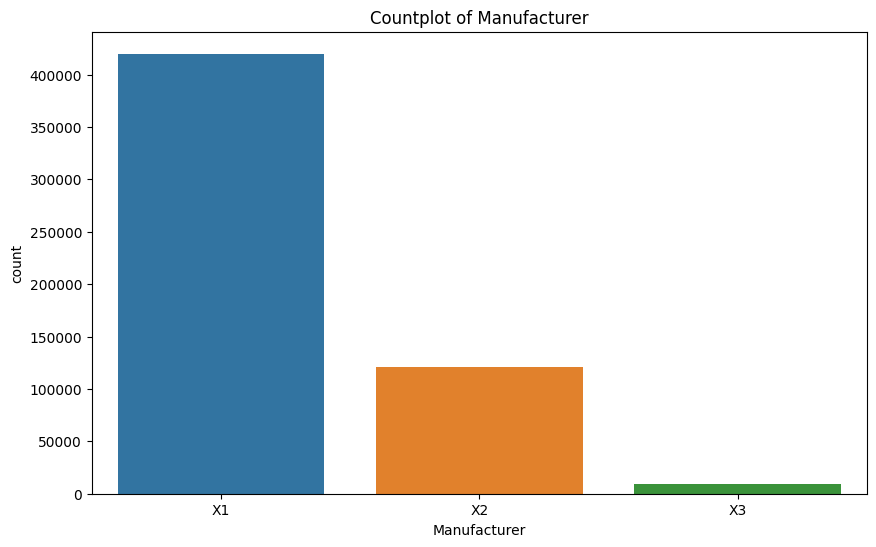

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('Train.xlsx')  

print("First few rows of the dataset:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data visualization
# Pairplot
sns.pairplot(df)
plt.title("Pairplot of the dataset")
plt.show()

#Handle outliers 

# Boxplot for Sourcing Cost
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sourcing Cost', data=df)
plt.title("Boxplot of Sourcing Cost")
plt.show()

# Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='ProductType', data=df)
plt.title("Countplot of ProductType")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Manufacturer', data=df)
plt.title("Countplot of Manufacturer")
plt.show()



In [ ]:
#Linear Regression 
import pandas as pd
import numpy as np

# Function to calculate m and b
def linear_regression(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    numerator = np.sum((X - x_mean) * (y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)
    m = numerator / denominator
    b = y_mean - (m * x_mean)
    return m, b

# Function to calculate prediction
def predict(X, m, b):
    return m * X + b

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Load train and test datasets (assuming train_df and test_df are already loaded)
train_df = pd.read_excel('Train.xlsx')
test_df = pd.read_excel('test.xlsx')

# Extract features (X) and target variable (y) from train dataset
X_train = train_df.drop(columns=['Sourcing Cost','Month of Sourcing'])
y_train = train_df['Sourcing Cost'].values

# Extract features (X) and target variable (y) from test dataset
X_test = test_df.drop(columns=['Sourcing Cost','Month of Sourcing'])
y_test = test_df['Sourcing Cost'].values

# Training the model
m, b = linear_regression(X_train, y_train)

# Making predictions on train and test datasets
train_predictions = predict(X_train, m, b)
test_predictions = predict(X_test, m, b)

# Calculating RMSE for train and test datasets
train_error = rmse(y_train, train_predictions)
test_error = rmse(y_test, test_predictions)

print("Train RMSE:", train_error)
print("Test RMSE:", test_error)



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_excel('Train.xlsx')

# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df)

# Separate features (X_train) and target variable (y_train)
X_train = df_encoded.drop(columns=['Sourcing Cost','Month of Sourcing'])  # Features
y_train = df_encoded['Sourcing Cost']  # Target variable

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
13755/13755 [==============================] - 38s 3ms/step - loss: 7813.5581 - val_loss: 11158.6709
Epoch 2/50
13755/13755 [==============================] - 47s 3ms/step - loss: 7646.4404 - val_loss: 11150.5889
Epoch 3/50
13755/13755 [==============================] - 46s 3ms/step - loss: 7650.0576 - val_loss: 11142.4854
Epoch 4/50
13755/13755 [==============================] - 47s 3ms/step - loss: 7647.2622 - val_loss: 11140.4092
Epoch 5/50
13755/13755 [==============================] - 47s 3ms/step - loss: 7648.3760 - val_loss: 11146.3076
Epoch 6/50
13755/13755 [==============================] - 36s 3ms/step - loss: 7646.8843 - val_loss: 11174.8555
Epoch 7/50
13755/13755 [==============================] - 36s 3ms/step - loss: 7646.3828 - val_loss: 11145.1455
Epoch 8/50
13755/13755 [==============================] - 39s 3ms/step - loss: 7646.4863 - val_loss: 11150.2871
Epoch 9/50
13755/13755 [==============================] - 39s 3ms/step - loss: 7642.9023 - val_loss: 111

In [44]:
# Load the test dataset
test_df = pd.read_excel('test.xlsx')

# Perform one-hot encoding on categorical variables
test_encoded = pd.get_dummies(test_df)

# Separate features (X_test) and target variable (y_test)
X_test = test_encoded.drop(columns=['Sourcing Cost', 'Month of Sourcing'])  # Features
y_test = test_encoded['Sourcing Cost']  # Target variable

# Make predictions on the test dataset
predictions = model.predict(X_test)

# Display the predicted results
print("Predicted Results:")
print(predictions)


3/3 [==============================] - 0s 5ms/step
Predicted Results:
[[103.37897 ]
 [150.54213 ]
 [153.2873  ]
 [147.37816 ]
 [165.66359 ]
 [173.93626 ]
 [ 41.295525]
 [118.280624]
 [146.79047 ]
 [142.15219 ]
 [146.28056 ]
 [135.80702 ]
 [ 95.25127 ]
 [142.65402 ]
 [143.55473 ]
 [157.51236 ]
 [157.26233 ]
 [147.00348 ]
 [145.45593 ]
 [146.8398  ]
 [149.20782 ]
 [147.17061 ]
 [149.42249 ]
 [ 28.476616]
 [ 77.24667 ]
 [ 34.39539 ]
 [ 24.15828 ]
 [ 31.002127]
 [ 24.854206]
 [224.9581  ]
 [184.40083 ]
 [164.07117 ]
 [ 34.45992 ]
 [ 25.491636]
 [ 70.36102 ]
 [147.20274 ]
 [159.93726 ]
 [147.44601 ]
 [146.44177 ]
 [110.680466]
 [ 59.46567 ]
 [105.306015]
 [177.42052 ]
 [168.49602 ]
 [140.65381 ]
 [ 40.000107]
 [208.23398 ]
 [210.86884 ]
 [105.54976 ]
 [102.660645]
 [ 80.090454]
 [146.30061 ]
 [ 81.80047 ]
 [ 41.224297]
 [182.18582 ]
 [163.40549 ]
 [172.41821 ]
 [216.26823 ]
 [216.0213  ]
 [142.70581 ]
 [133.49799 ]
 [146.589   ]
 [145.75264 ]
 [146.93987 ]
 [146.67041 ]
 [146.40671 ]
 [145.

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the actual sourcing costs from the test dataset
actual_sourcing_costs = test_encoded['Sourcing Cost']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_sourcing_costs, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_sourcing_costs, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 19.87625342607498
Mean Squared Error (MSE): 1396.4287242972948
Root Mean Squared Error (RMSE): 37.36882021548573


In [ ]:
'''
For the dataset provided, I have used linear regression and neural networks to predict the required values of Test dataset.
The neural network model approach is what i found to be slightly easily implementable rather than linear regression. There are 2 reasons for this. 
Firstly, considering the large size of the train dataset and secondly, the non linear relationship among the columns of the dataset made neural model 
approach more probable since it captures the complex nonlinear relationships amongst the columns.
Hence, I have used the neural network model approach to handle complexity and non linear relationships in the dataset.
'''